In [1]:
import numpy as np
from numpy import random
import nest
import nest.raster_plot
import matplotlib.pyplot as plt
from matplotlib import rcParams 


              -- N E S T --
  Copyright (C) 2004 The NEST Initiative

 Version: 3.3
 Built: May  5 2022 07:35:57

 This program is provided AS IS and comes with
 NO WARRANTY. See the file LICENSE for details.

 Problems or suggestions?
   Visit https://www.nest-simulator.org

 Type 'nest.help()' to find out more about NEST.



In [2]:
text_color = 'black' 
rcParams['text.color'] = text_color 
rcParams['axes.labelcolor'] = text_color 
rcParams['xtick.color'] = text_color 
rcParams['ytick.color'] = text_color 
plt.rc('font', size=12)          # controls default text sizes 
plt.rc('axes', titlesize=16)     # fontsize of the axes title 
plt.rc('axes', labelsize=12)    # fontsize of the x and y labels 
plt.rc('xtick', labelsize=12)    # fontsize of the tick labels 
plt.rc('ytick', labelsize=12)    # fontsize of the tick labels 
plt.rc('legend', fontsize=12)    # legend fontsize 
plt.rc('figure', titlesize=16)  # fontsize of the figure title

In [6]:
n_folder = 6
tone = 100
angles = np.arange(-90,100,15)

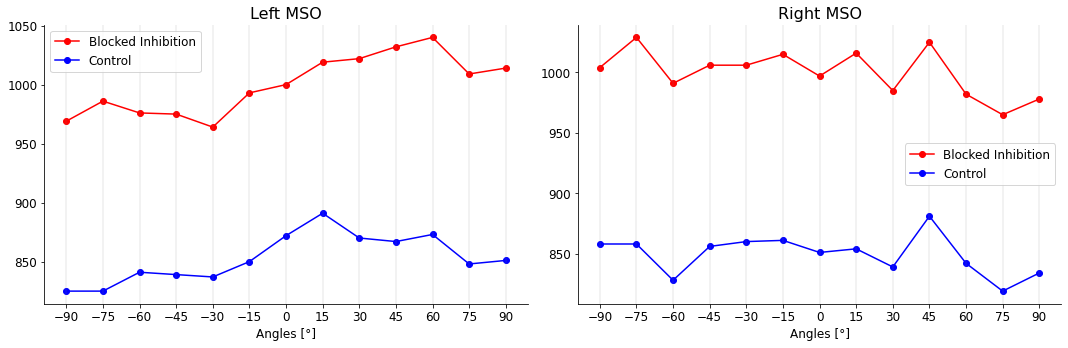

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))
        
path_r = '/home/ubuntu/cosyne-tutorial-2022/results{}/MSO_r_freq_{}'.format(n_folder, tone)
path_l = '/home/ubuntu/cosyne-tutorial-2022/results{}/MSO_l_freq_{}'.format(n_folder, tone)

ax[1].set_title("Right MSO")
ax[0].set_title("Left MSO")
#ax[0].set_ylabel("Absolute Spikes")

ax[1].plot(angles,np.loadtxt(path_r)[0],"ro-", label = "Blocked Inhibition")
ax[1].plot(angles,np.loadtxt(path_r)[1],"bo-", label = "Control")
ax[0].plot(angles,np.loadtxt(path_l)[0],"ro-", label = "Blocked Inhibition")
ax[0].plot(angles,np.loadtxt(path_l)[1],"bo-", label = "Control")

for i in range(len(angles)):
    ax[0].axvline(angles[i], linewidth = 0.2, color = 'grey')
    ax[1].axvline(angles[i], linewidth = 0.2, color = 'grey')

ax[0].set_xlabel("Angles [°]")
ax[0].set_xticks(angles)
ax[0].legend()
ax[0].spines['top'].set_visible(False) 
ax[0].spines['right'].set_visible(False)

ax[1].set_xlabel("Angles [°]")
ax[1].set_xticks(angles)
ax[1].legend()
ax[1].spines['top'].set_visible(False) 
ax[1].spines['right'].set_visible(False)
fig.tight_layout()
#plt.savefig('all')

In [38]:
tone = 100
nuclei = ['SBC', 'GBC', 'LSO']
angles = np.arange(-90, 100, 10)

In [46]:
n_folder = 1

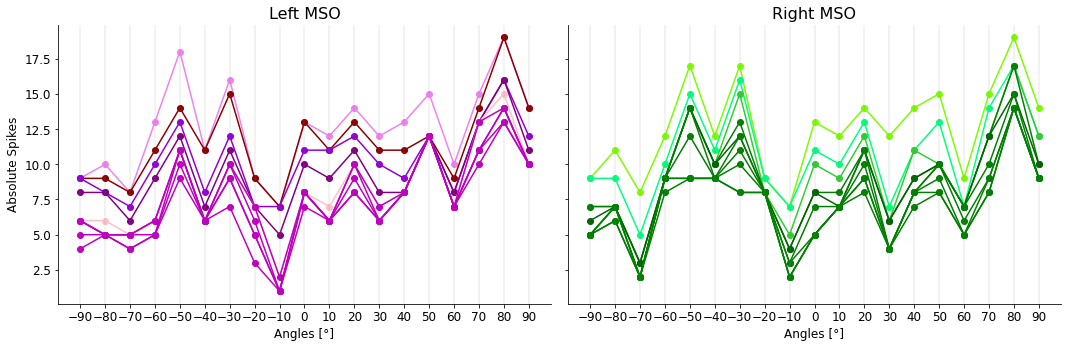

In [47]:
fig, ax = plt.subplots(1, 2, figsize=(15,5), sharey = True)
MNTBCs2MSO_weights = [0, -2.0, -4.0, -6.0, -8.0, -10.0, -12.0, -14.0, -16.0, -20.0]

colorsr = ['lawngreen', 'springgreen', 'limegreen', 'green', 'darkgreen','g', 'g', 'g', 'g', 'g']
colorsl = ['violet', 'darkred', 'darkviolet', 'purple', 'pink', 'm', 'm', 'm', 'm', 'm']
        
path_r = '/home/ubuntu/cosyne-tutorial-2022/results{}/MSO_r_freq_{}'.format(n_folder, tone)
path_l = '/home/ubuntu/cosyne-tutorial-2022/results{}/MSO_l_freq_{}'.format(n_folder, tone)

ax[1].set_title("Right MSO")
ax[0].set_title("Left MSO")
ax[0].set_ylabel("Absolute Spikes")

for w in range(len(MNTBCs2MSO_weights)):
    ax[1].plot(angles,np.loadtxt(path_r)[w,:],"o-", color = colorsr[w], label = "Right MSO w = {} nS".format(MNTBCs2MSO_weights[w]))
    ax[0].plot(angles,np.loadtxt(path_l)[w,:],"o-", label = "Left MSO w = {} nS".format(MNTBCs2MSO_weights[w]), color = colorsl[w])

for i in range(len(angles)):
    ax[0].axvline(angles[i], linewidth = 0.2, color = 'grey')
    ax[1].axvline(angles[i], linewidth = 0.2, color = 'grey')

ax[0].set_xlabel("Angles [°]")
ax[0].set_xticks(angles)
#ax.legend()
ax[0].spines['top'].set_visible(False) 
ax[0].spines['right'].set_visible(False)

ax[1].set_xlabel("Angles [°]")
ax[1].set_xticks(angles)
#ax.legend()
ax[1].spines['top'].set_visible(False) 
ax[1].spines['right'].set_visible(False)
fig.tight_layout()
plt.savefig('all')

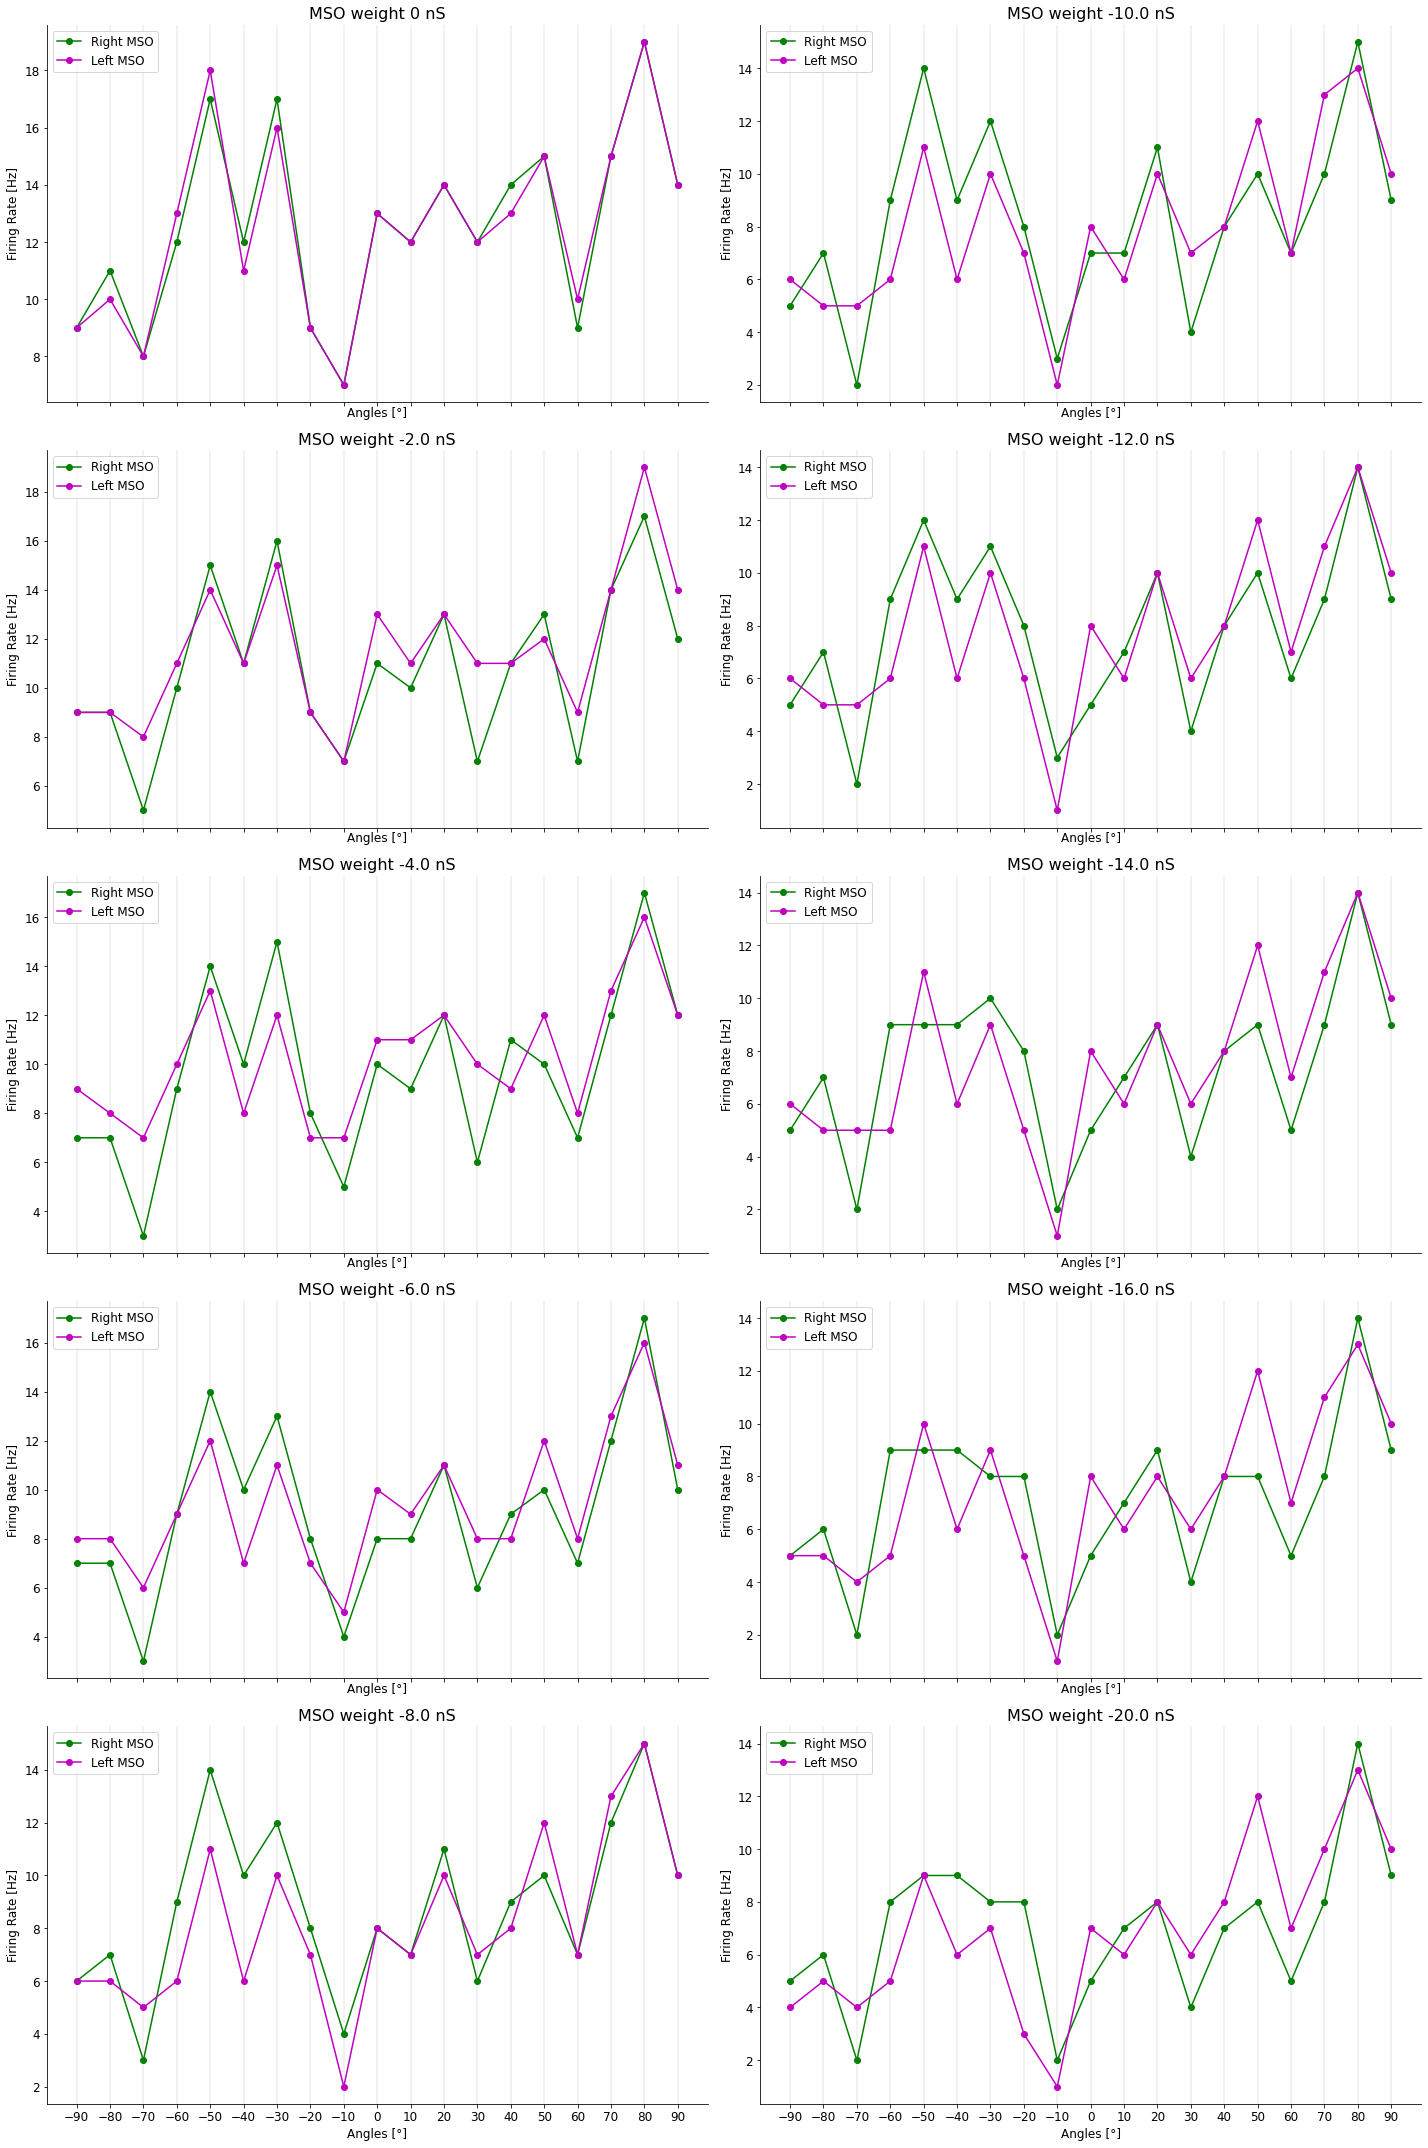

In [48]:
fig, ax = plt.subplots(5, 2, figsize=(20,30), sharex=True)

for w in range(5):
    ax[w,0].set_title("MSO weight {} nS".format(MNTBCs2MSO_weights[w]))
    ax[w,0].set_ylabel("Firing Rate [Hz]")
    
    ax[w,0].plot(angles,np.loadtxt(path_r)[w,:],"o-g",label = "Right MSO")
    ax[w,0].plot(angles,np.loadtxt(path_l)[w,:],"o-m", label = "Left MSO")

    for i in range(len(angles)):
        ax[w,0].axvline(angles[i], linewidth = 0.2, color = 'grey')

    ax[w,0].set_xlabel("Angles [°]")
    ax[w,0].set_xticks(angles)
    ax[w,0].legend()
    ax[w,0].spines['top'].set_visible(False)
    ax[w,0].spines['right'].set_visible(False)

    ax[w,1].set_title("MSO weight {} nS".format(MNTBCs2MSO_weights[w+5]))
    ax[w,1].set_ylabel("Firing Rate [Hz]")
    
    ax[w,1].plot(angles,np.loadtxt(path_r)[w+5,:],"o-g",label = "Right MSO")
    ax[w,1].plot(angles,np.loadtxt(path_l)[w+5,:],"o-m", label = "Left MSO")

    for i in range(len(angles)):
        ax[w,1].axvline(angles[i], linewidth = 0.2, color = 'grey')

    ax[w,1].set_xlabel("Angles [°]")
    ax[w,1].set_xticks(angles)
    ax[w,1].legend()
    ax[w,1].spines['top'].set_visible(False)
    ax[w,1].spines['right'].set_visible(False)
    
fig.tight_layout()
plt.savefig('each')

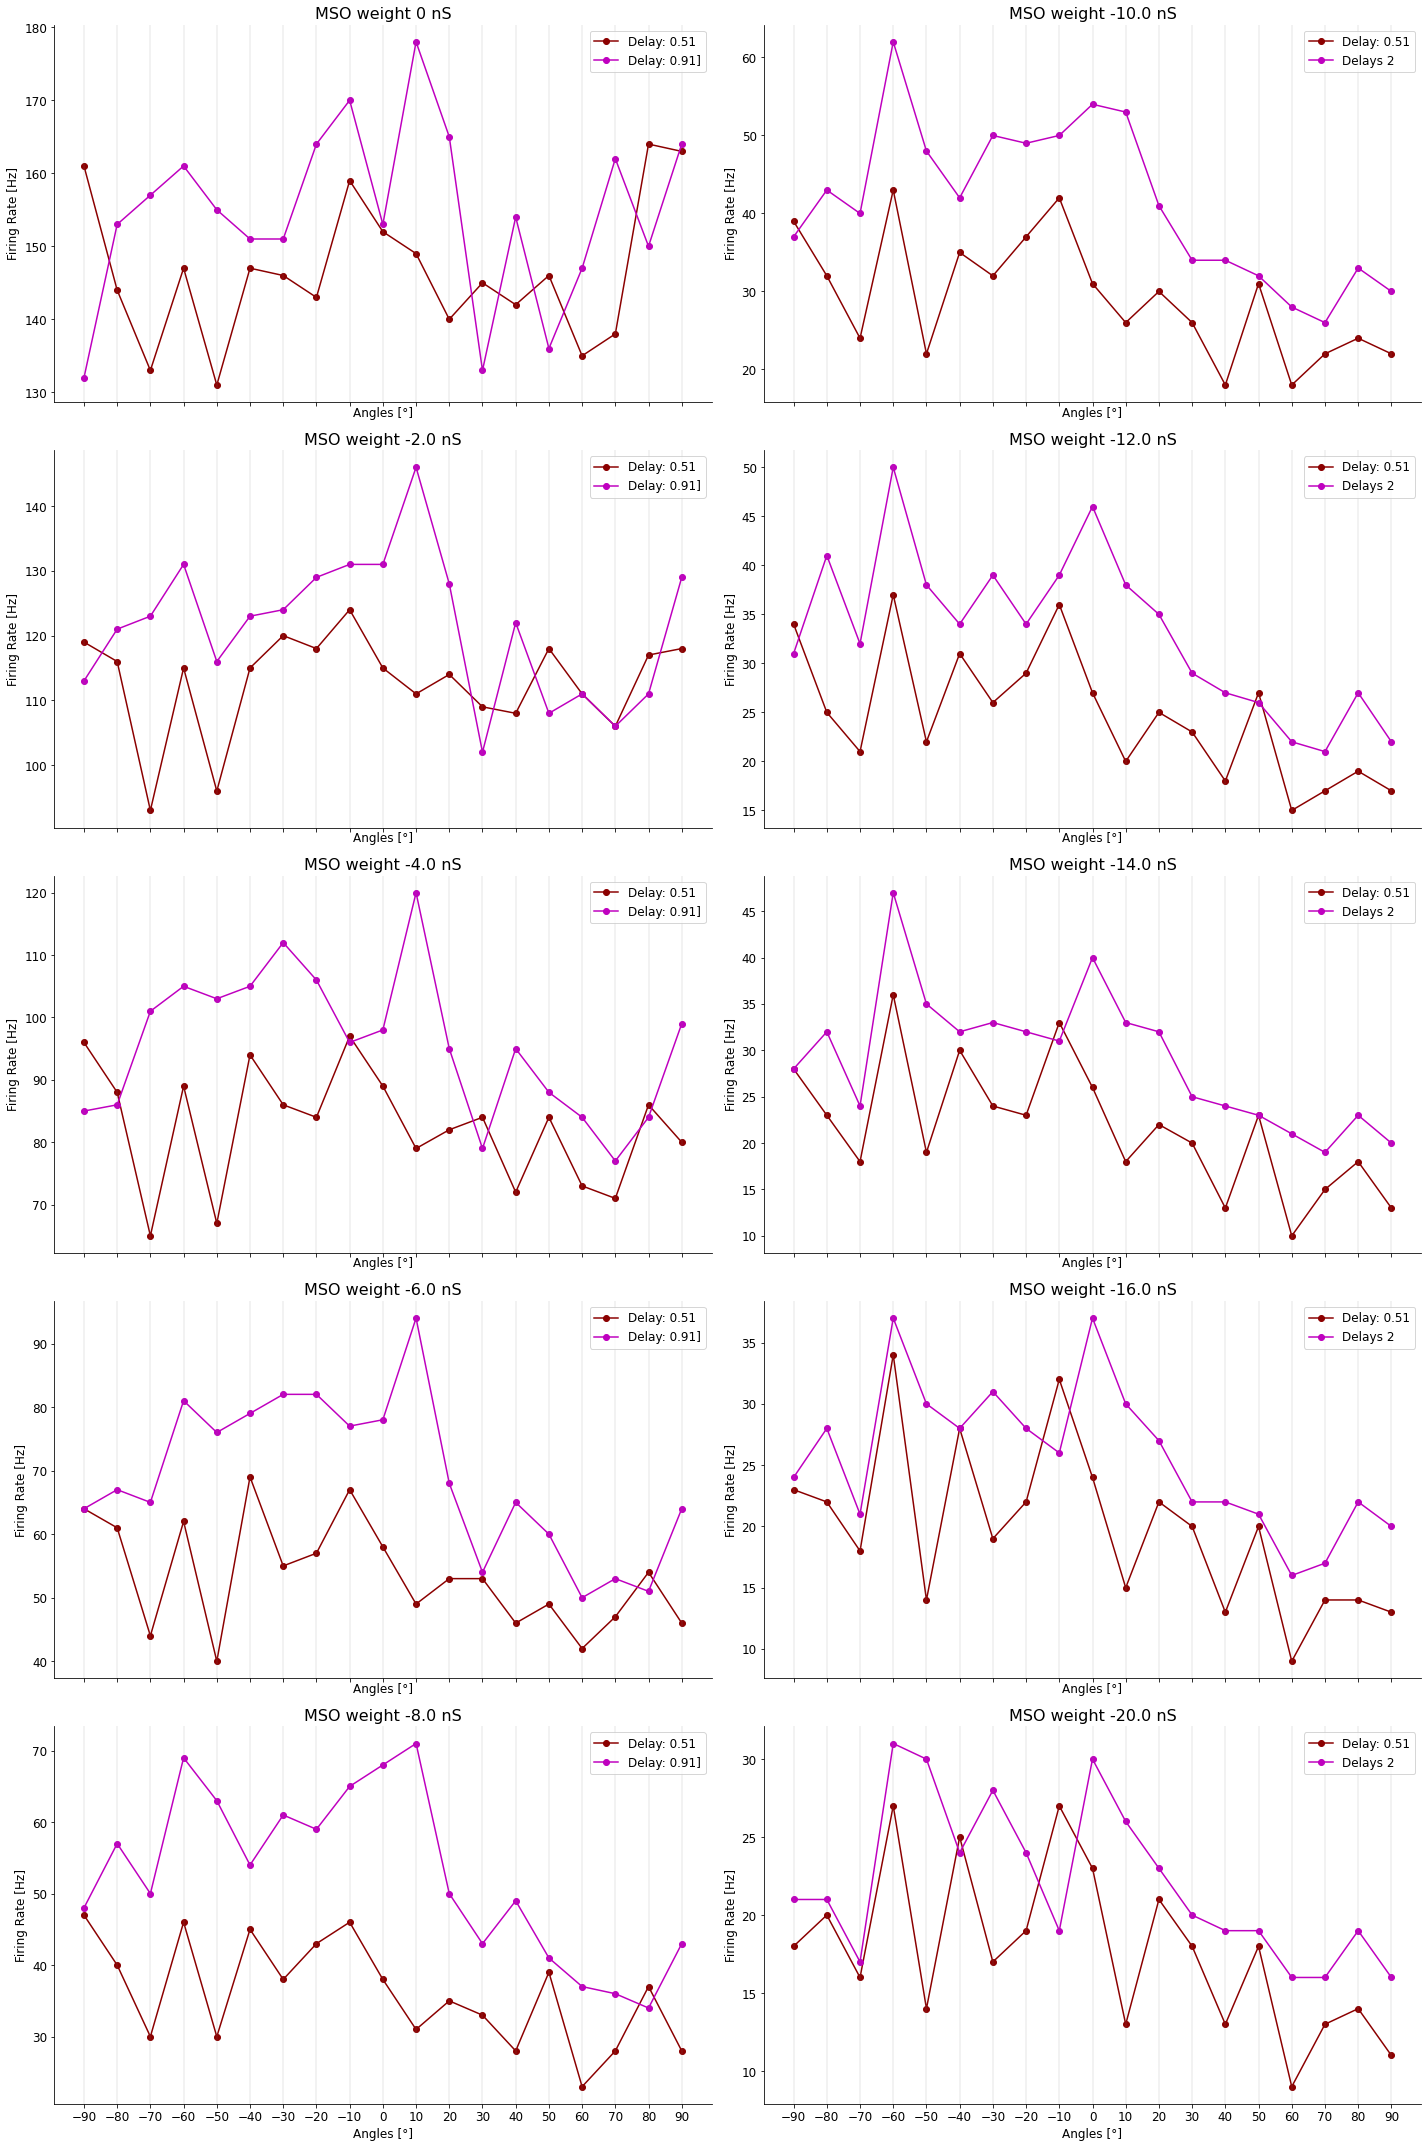

In [45]:
fig, ax = plt.subplots(5, 2, figsize=(20,30), sharex=True)

path_1 = '/home/ubuntu/cosyne-tutorial-2022/results{}/MSO_l_freq_{}'.format(5, tone)
path_2 = '/home/ubuntu/cosyne-tutorial-2022/results{}/MSO_l_freq_{}'.format(3, tone)

for w in range(5):
    ax[w,0].set_title("MSO weight {} nS".format(MNTBCs2MSO_weights[w]))
    ax[w,0].set_ylabel("Firing Rate [Hz]")
    
    ax[w,0].plot(angles,np.loadtxt(path_1)[w,:],"o-", color = 'darkred', label = "Delay: 0.51")
    ax[w,0].plot(angles,np.loadtxt(path_2)[w,:],"o-m", label = "Delay: 0.91]")

    for i in range(len(angles)):
        ax[w,0].axvline(angles[i], linewidth = 0.2, color = 'grey')

    ax[w,0].set_xlabel("Angles [°]")
    ax[w,0].set_xticks(angles)
    ax[w,0].legend()
    ax[w,0].spines['top'].set_visible(False)
    ax[w,0].spines['right'].set_visible(False)

    ax[w,1].set_title("MSO weight {} nS".format(MNTBCs2MSO_weights[w+5]))
    ax[w,1].set_ylabel("Firing Rate [Hz]")
    
    ax[w,1].plot(angles,np.loadtxt(path_1)[w+5,:],"o-", color = 'darkred', label = "Delay: 0.51")
    ax[w,1].plot(angles,np.loadtxt(path_2)[w+5,:],"o-m", label = "Delays 2")

    for i in range(len(angles)):
        ax[w,1].axvline(angles[i], linewidth = 0.2, color = 'grey')

    ax[w,1].set_xlabel("Angles [°]")
    ax[w,1].set_xticks(angles)
    ax[w,1].legend()
    ax[w,1].spines['top'].set_visible(False)
    ax[w,1].spines['right'].set_visible(False)
    
fig.tight_layout()
plt.savefig('each')

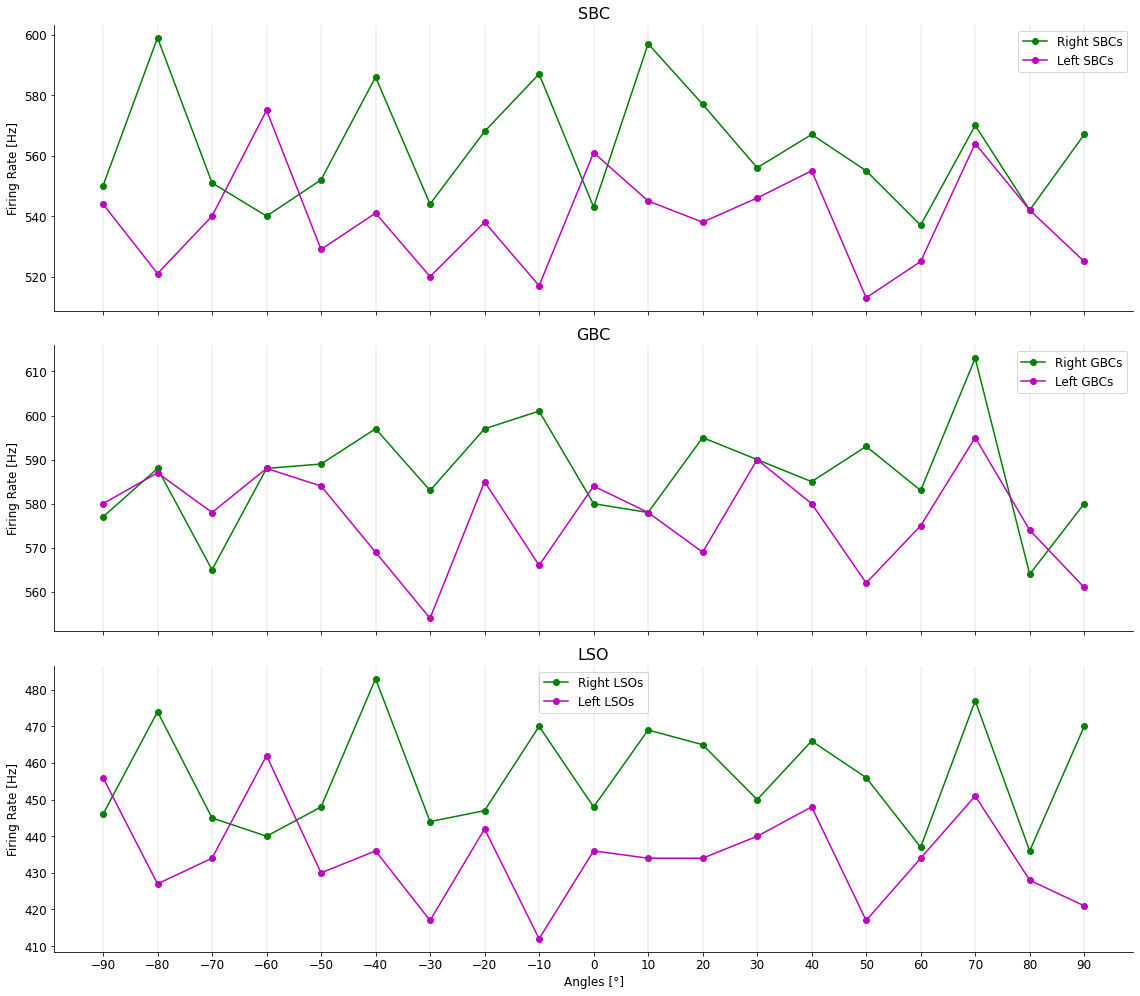

In [15]:
fig, ax = plt.subplots(len(nuclei), 1, figsize=(16,14), sharex=True)


for n in nuclei:
        
    path_r = '/home/ubuntu/cosyne-tutorial-2022/results{}/{}_r_freq_{}'.format(n_folder, n, tone)
    path_l = '/home/ubuntu/cosyne-tutorial-2022/results{}/{}_l_freq_{}'.format(n_folder, n, tone)
    
    ax[nuclei.index(n)].set_title("{}".format(n))
    ax[nuclei.index(n)].set_ylabel("Firing Rate [Hz]")
    
    ax[nuclei.index(n)].plot(angles,np.loadtxt(path_r),"o-g", label = 'Right {}s'.format(n))
    ax[nuclei.index(n)].plot(angles,np.loadtxt(path_l),"o-m", label = 'Left {}s'.format(n))
    ax[nuclei.index(n)].legend()

    for i in range(len(angles)):
        ax[nuclei.index(n)].axvline(angles[i], linewidth = 0.2, color = 'grey')

    ax[nuclei.index(n)].spines['top'].set_visible(False)
    ax[nuclei.index(n)].spines['right'].set_visible(False)
    
ax[-1].set_xlabel("Angles [°]")
ax[-1].set_xticks(angles)
fig.tight_layout()

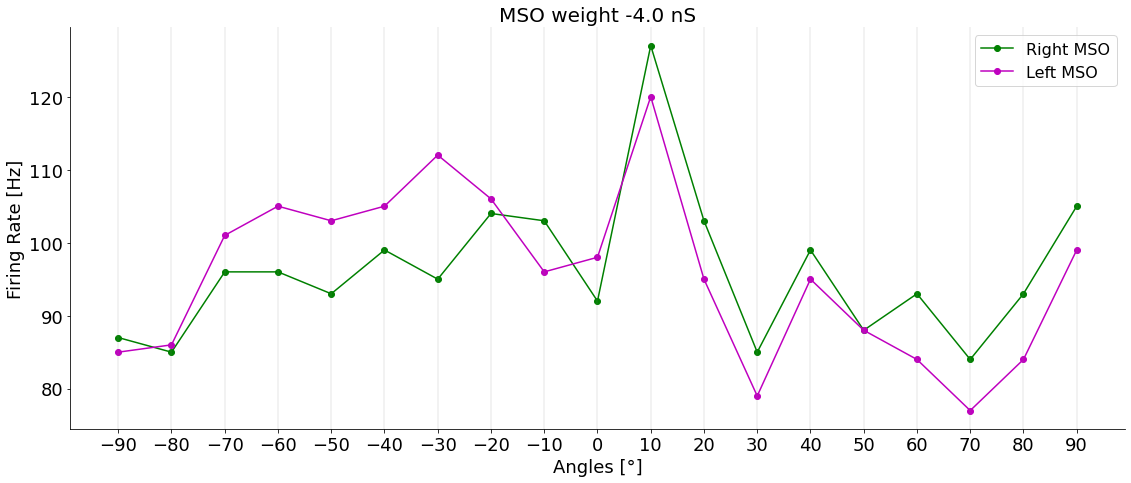

In [98]:
fig, ax = plt.subplots(1, 1, figsize=(16,7), sharex=True)
w = 2

ax.set_title("MSO weight {} nS".format(MNTBCs2MSO_weights[w]))
ax.set_ylabel("Firing Rate [Hz]")


ax.plot(angles,np.loadtxt(path_r)[w,:],"o-g",label = "Right MSO")
ax.plot(angles,np.loadtxt(path_l)[w,:],"o-m", label = "Left MSO")

for i in range(len(angles)):
    ax.axvline(angles[i], linewidth = 0.2, color = 'grey')

ax.set_xlabel("Angles [°]")
ax.set_xticks(angles)
ax.legend()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
fig.tight_layout()

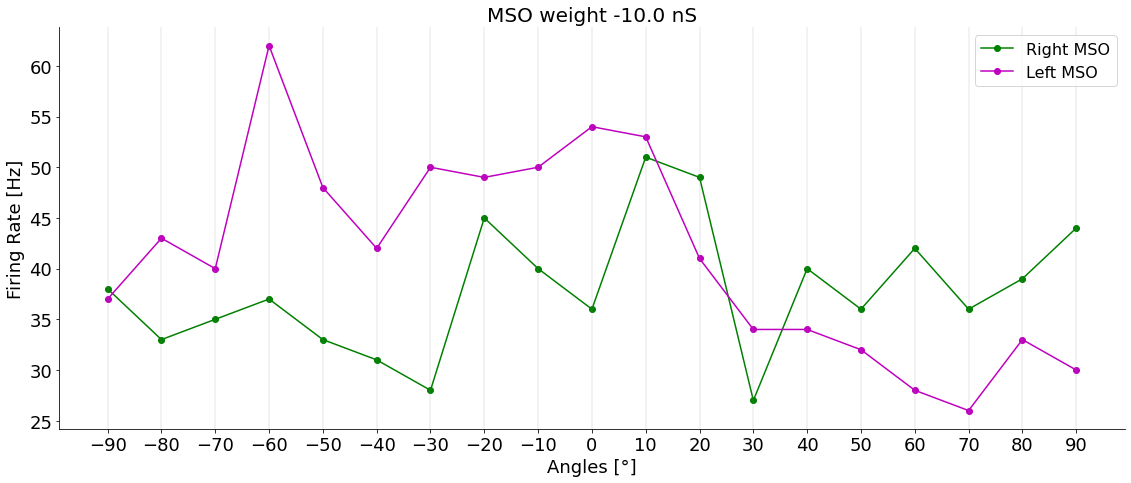

In [99]:
fig, ax = plt.subplots(1, 1, figsize=(16,7), sharex=True)
w = 5

ax.set_title("MSO weight {} nS".format(MNTBCs2MSO_weights[w]))
ax.set_ylabel("Firing Rate [Hz]")


ax.plot(angles,np.loadtxt(path_r)[w,:],"o-g",label = "Right MSO")
ax.plot(angles,np.loadtxt(path_l)[w,:],"o-m", label = "Left MSO")

for i in range(len(angles)):
    ax.axvline(angles[i], linewidth = 0.2, color = 'grey')

ax.set_xlabel("Angles [°]")
ax.set_xticks(angles)
ax.legend()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
fig.tight_layout()

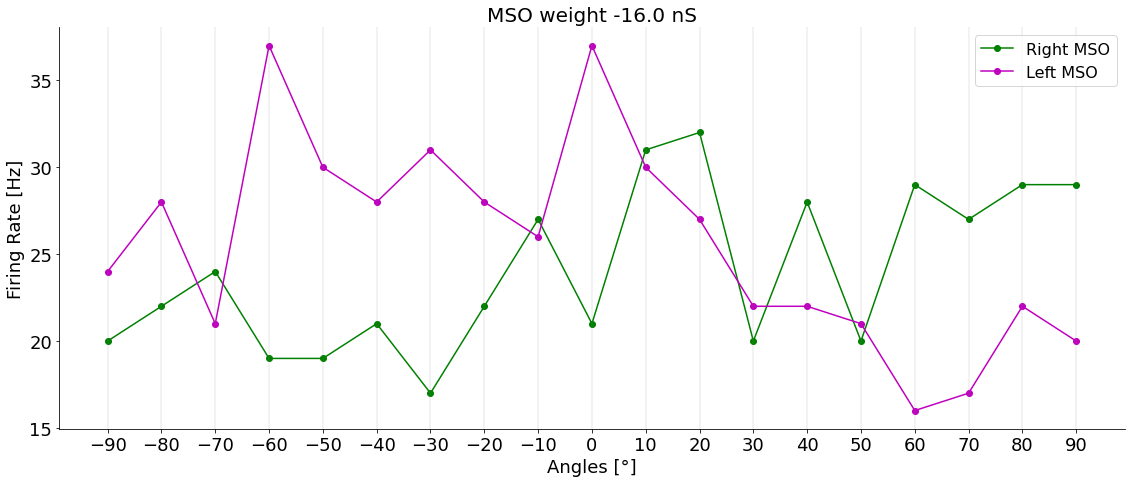

In [100]:
fig, ax = plt.subplots(1, 1, figsize=(16,7), sharex=True)
w = 8

ax.set_title("MSO weight {} nS".format(MNTBCs2MSO_weights[w]))
ax.set_ylabel("Firing Rate [Hz]")


ax.plot(angles,np.loadtxt(path_r)[w,:],"o-g",label = "Right MSO")
ax.plot(angles,np.loadtxt(path_l)[w,:],"o-m", label = "Left MSO")

for i in range(len(angles)):
    ax.axvline(angles[i], linewidth = 0.2, color = 'grey')

ax.set_xlabel("Angles [°]")
ax.set_xticks(angles)
ax.legend()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
fig.tight_layout()

In [40]:
r_ANFs = nest.Create('parrot_neuron', 1)

l_ANFs = nest.Create('parrot_neuron',1)

nest.Connect(r_ANFs, l_ANFs)

In [42]:
nest.GetConnections()